In [2]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
X, y = mnist['data'], mnist['target']

In [38]:
print(X.shape)
print(y.T.shape)
print(y.shape)
print(y)

(784, 60000)
(70000, 1)
(1, 70000)
[['5' '0' '4' ... '4' '5' '6']]


In [6]:
# shape
print(X.shape)
print(y.shape)

# Normalize
X = X/255
print(type(y[1]))


(70000, 784)
(70000,)
<class 'str'>


In [7]:
#  we’re just building a zero-classifier for now. So we want our labels to say 1 when we have a zero, and 0 otherwise

y_new = np.zeros((y.shape[0],1))
y_new[y == '0'] = 1
y_new[y != '0'] = 0
y_new.shape
y = y_new

In [8]:
# Transform data --> each example in a column instead of a row

m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:,].T
y_train, y_test = y[:m].reshape(1, m), y[m:].reshape(1,m_test)


In [9]:
print(X_train.shape) # One example in each column
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


In [10]:
# Shuffle the training set
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

In [11]:
X_train[:,3].shape

(784,)

[1.]


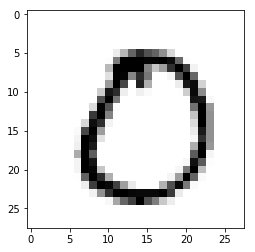

In [12]:
# Random image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 40
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
print(y_train[:,i])

# label is 0, because we are just training a binary classifier

## A Single Neuron ( Logistic Regression) - Binary Classification

In [13]:
# Sigmoid

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s
def compute_loss(Y,Y_hat):
    m = Y.shape[1]
    L = -(1 / m) * np.sum ( (Y * np.log(Y_hat)) + ((1 - Y) * np.log(1 - Y_hat))  )
    return L

In [14]:
learning_rate = 0.05

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(1500):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    
    dW = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A -Y, axis =1 , keepdims = True)
    
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)
    
    if (i % 100 ==0):
        print ("Iteration : ", i, "cost : ", cost)
print ("Final cost - ", cost)

Iteration :  0 cost :  0.6840801595436431
Iteration :  100 cost :  0.10781549403603288
Iteration :  200 cost :  0.08245533921989824
Iteration :  300 cost :  0.07142765065115936
Iteration :  400 cost :  0.06485584350261014
Iteration :  500 cost :  0.06036454927983813
Iteration :  600 cost :  0.05704607944076546
Iteration :  700 cost :  0.0544660009146988
Iteration :  800 cost :  0.05238622282817923
Iteration :  900 cost :  0.05066378415961421
Iteration :  1000 cost :  0.04920697012059556
Iteration :  1100 cost :  0.04795389640787956
Iteration :  1200 cost :  0.04686110603804828
Iteration :  1300 cost :  0.04589707543148204
Iteration :  1400 cost :  0.04503831260139265
Final cost -  0.04427423766197228


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)
print(Z.shape)
#predictions = (A > 0.5)[0,:]
#labels = (y_test == 1)[0,:]
#print(confusion_matrix(predictions, labels))

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]
print(labels.shape)

print(confusion_matrix(labels, predictions))

# We got 936 of the zeroes predicted correctly and missed 49.

(1, 10000)
(10000,)
[[8971   49]
 [  44  936]]


In [17]:
print (classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9015
        True       0.96      0.95      0.95       985

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.99      0.99      0.99     10000



## One Hidden Layer - Binary Classification

In [ ]:
# Add a hidden layer with 64 units

In [307]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 0.05

W1 = np.random.randn(n_h, n_x) * 0.01
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h) * 0.01
b2 = np.zeros((1,1))

for i in range(1500):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cost = compute_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost) 
print('Final cost - ', cost)

Epoch 0 cost:  0.6810210349421688
Epoch 100 cost:  0.30521416559436304
Epoch 200 cost:  0.28392935683610476
Epoch 300 cost:  0.2604250112383746
Epoch 400 cost:  0.2363434609738409
Epoch 500 cost:  0.21342069889010767
Epoch 600 cost:  0.1925596377131004
Epoch 700 cost:  0.17381216105618738
Epoch 800 cost:  0.15670476159176763
Epoch 900 cost:  0.14066741304824584
Epoch 1000 cost:  0.12573536164273222
Epoch 1100 cost:  0.11260831875976236
Epoch 1200 cost:  0.10169404645757722
Epoch 1300 cost:  0.09284464786253106
Epoch 1400 cost:  0.08568247698510707
Final cost -  0.07988018005220902


In [308]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[8982  180]
 [  38  800]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99      9162
        True       0.82      0.95      0.88       838

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.91      0.97      0.93     10000
weighted avg       0.98      0.98      0.98     10000



## Multiclass Classification

In [33]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [46]:
X, y = mnist['data'], mnist['target']
X = X / 255

In [47]:
# Reshape Y

digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)
Y_new.shape

(10, 70000)

In [48]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

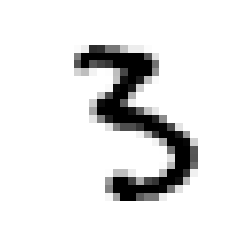

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [53]:
i = 32
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [54]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [59]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2 - Y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.536759414730373
Epoch 100 cost:  0.765410456171843
Epoch 200 cost:  0.5761323898446676
Epoch 300 cost:  0.49415197183743803
Epoch 400 cost:  0.4444434638304048
Epoch 500 cost:  0.4097798352340085
Epoch 600 cost:  0.38365617765918236
Epoch 700 cost:  0.36289211326444343
Epoch 800 cost:  0.34576709620603585
Epoch 900 cost:  0.33125054642150586
Epoch 1000 cost:  0.3187123348140507
Epoch 1100 cost:  0.30771974318465906
Epoch 1200 cost:  0.2979570345443281
Epoch 1300 cost:  0.2891883602946375
Epoch 1400 cost:  0.28123502916245446
Epoch 1500 cost:  0.2739631566770871
Epoch 1600 cost:  0.26726864192437266
Epoch 1700 cost:  0.26106773700697367
Epoch 1800 cost:  0.2552937783265869
Epoch 1900 cost:  0.24989381082225504
Final cost: 0.2448741623496549


## Accuracy, Confusion Matrix

In [60]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 954    0   10    1    1   13    9    2    5    6]
 [   0 1107    4    1    2    1    3   11    1    6]
 [   1    5  944   18    8    8    7   27   10    5]
 [   0    3   14  923    1   37    1    6   28    8]
 [   1    0   13    0  896    9   13    6   13   36]
 [  10    2    5   25    3  776   11    1   21   13]
 [   6    4   11    3   14   17  905    0   12    1]
 [   1    0   12   12    3    7    2  934   12   21]
 [   4   14   18   23   11   19    6    8  863   11]
 [   3    0    1    4   43    5    1   33    9  902]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1001
           1       0.98      0.97      0.97      1136
           2       0.91      0.91      0.91      1033
           3       0.91      0.90      0.91      1021
           4       0.91      0.91      0.91       987
           5       0.87      0.90      0.88       867
           6       0.94      0.93      0.94       973
           7       0.91      0.93   

### Accuracy is 92 percent. In the next upload, I will try to optimize this algorithm